In [1]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

np.set_printoptions(threshold=np.inf)

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [2]:
def AlexNet():
    inputs=tf.keras.Input(shape=(32,32,3))
    x=tf.keras.layers.Conv2D(filters=96,kernel_size=(3,3),strides=1,padding='valid')(inputs)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.Activation('relu')(x)
    x=tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=2)(x)
        
    x=tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=1,padding='valid')(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.Activation('relu')(x)
    x=tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=2)(x)
        
    x=tf.keras.layers.Conv2D(filters=384,kernel_size=(3,3),padding='same',activation='relu')(x)
        
    x=tf.keras.layers.Conv2D(filters=384,kernel_size=(3,3),padding='same',activation='relu')(x)
        
    x=tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=1,padding='same',activation='relu')(x)
    x=tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=2)(x)
        
    x=tf.keras.layers.Flatten()(x)
    x=tf.keras.layers.Dense(2048,activation='relu')(x)
    x=tf.keras.layers.Dropout(0.5)(x)
        
    x=tf.keras.layers.Dense(2048,activation='relu')(x)
    x=tf.keras.layers.Dropout(0.5)(x)
        
    output=tf.keras.layers.Dense(10,activation='softmax')(x)
    model=tf.keras.Model(inputs,output)
    
    return model
    
    
        

In [3]:
model = AlexNet()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/Baseline.ckpt"

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])
model.summary()

Epoch 1/5
782/782 [==============================] - 22s 25ms/step - loss: 1.5956 - sparse_categorical_accuracy: 0.4120 - val_loss: 1.8210 - val_sparse_categorical_accuracy: 0.3955
Epoch 2/5
782/782 [==============================] - 18s 23ms/step - loss: 1.2124 - sparse_categorical_accuracy: 0.5743 - val_loss: 1.2533 - val_sparse_categorical_accuracy: 0.5506
Epoch 3/5
782/782 [==============================] - 18s 24ms/step - loss: 1.0620 - sparse_categorical_accuracy: 0.6312 - val_loss: 1.0595 - val_sparse_categorical_accuracy: 0.6331
Epoch 4/5
782/782 [==============================] - 18s 23ms/step - loss: 0.9641 - sparse_categorical_accuracy: 0.6678 - val_loss: 1.1767 - val_sparse_categorical_accuracy: 0.5920
Epoch 5/5
782/782 [==============================] - 19s 24ms/step - loss: 0.8868 - sparse_categorical_accuracy: 0.6982 - val_loss: 1.0130 - val_sparse_categorical_accuracy: 0.6602
Model: "model"
_________________________________________________________________
 Layer (type) 

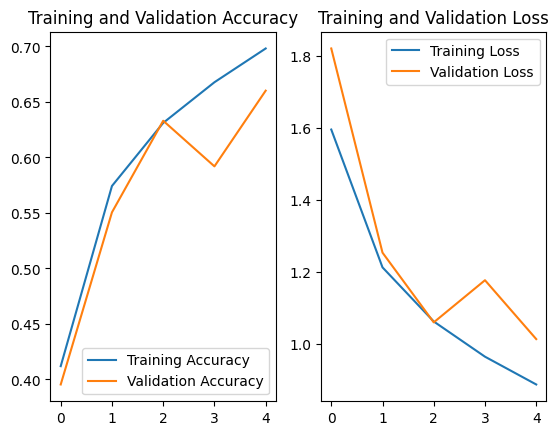

In [4]:
# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()